# Supervised Learning

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

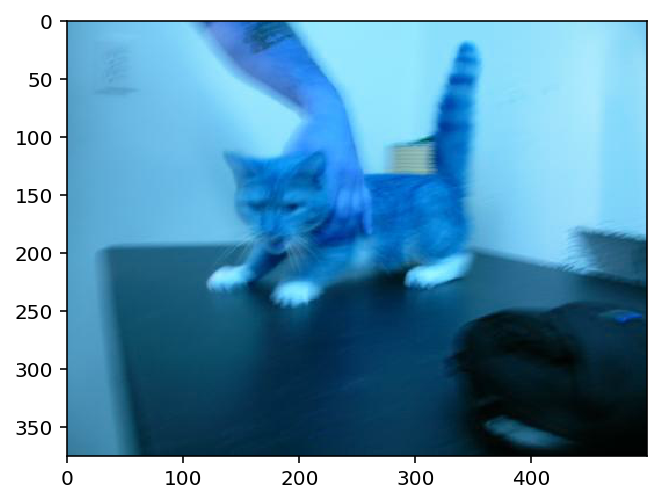

In [21]:
from IPython.display import display
import visuals as vs
image_size = 224
DATADIR = 'C:/Users/josep/Desktop/ECE/Spring 2020/ECE 523/Project/PetImages'
class_names = ['cat', 'dog']
for name in class_names:
    path = os.path.join(DATADIR, name) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

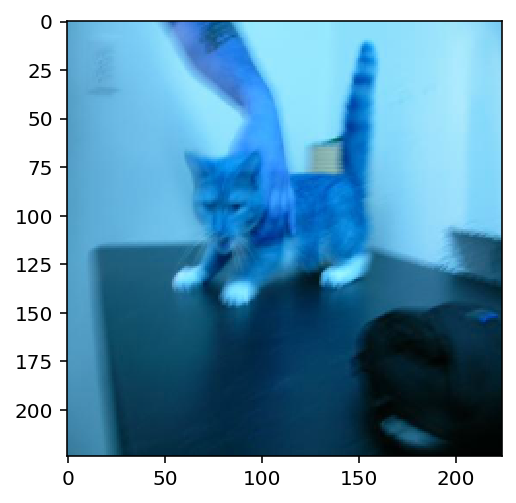

In [22]:
resized_array = cv2.resize(img_array, (image_size, image_size))
plt.imshow(resized_array)
plt.show()

In [23]:
training_set = []

def create_training_data():
    for name in class_names:
        path = os.path.join(DATADIR, name) # path to cats or dogs dir
        class_num = class_names.index(name)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (image_size, image_size))
                training_set.append([resized_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
random.shuffle(training_set)

X = []
y = []

for features, labels in training_set:
    X.append(features)
    y.append(labels)
    
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2] * X.shape[3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Random Forest Classification

In [28]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_params = {'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,5]}
scorer = make_scorer(fbeta_score, beta = 0.5)
rf_grid_obj = GridSearchCV(rf_classifier, rf_params, scoring = scorer)
rf_grid_fit = rf_grid_obj.fit(X_train, y_train)
rf_estimator = rf_grid_fit.best_estimator_
rf_predictions = (rf_classifier.fit(X_train, y_train)).predict(X_test)

# Support Vector Machine Classification

In [35]:
svm_classifier = SVC(random_state = 25)
svm_params = {'kernel': ['poly', 'rbf'], 'C': [0.1, 1, 10]}
svm_grid_obj = GridSearchCV(svm_classifier, svm_params, scoring = scorer)
svm_grid_fit = svm_grid_obj.fit(X_train, y_train)
svm_estimator = svm_grid_fit.best_estimator_
svm_predictions = (svm_classifier.fit(X_train, y_train)).predict(X_test)

# Accuracy and F-Score Metrics

In [42]:
print('Random Forest Model\n------')
print(f'Accuracy score on testing data for RF model: {accuracy_score(y_test, rf_predictions):.4%}')
print(f'F-score on testing data for RF model: {fbeta_score(y_test, rf_predictions, beta = 0.5):.4f}')
print("\nSupport Vector Machine Model\n------")
print(f'Accuracy score on testing data for RF model: {accuracy_score(y_test, svm_predictions):.4%}')
print(f'F-score on testing data for RF model: {fbeta_score(y_test, svm_predictions, beta = 0.5):.4f}')

Random Forest Model
------
Accuracy score on testing data for RF model: 55.7214%
F-score on testing data for RF model: 0.5277

Support Vector Machine Model
------
Accuracy score on testing data for RF model: 49.2537%
F-score on testing data for RF model: 0.5482
